In [1]:
import brightway2 as bw
import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python
import time

In [2]:
#bw.projects()
bw.projects.set_current("SpLCA_farm2020")

In [6]:
bw.Database('biosphere3')

Brightway2 SQLiteBackend: biosphere3

In [7]:
bw.Database('ecoinvent 3.6 cutoff')

Brightway2 SQLiteBackend: ecoinvent 3.6 cutoff

In [8]:
my_bio = bw.Database('biosphere3')
len(my_bio)  #4321

4321

In [9]:
eidb = bw.Database('ecoinvent 3.6 cutoff')

In [10]:
bw.databases        

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent 3.6 cutoff

# create empty activity (to be used in foreground) and search ecoinvent  

In [19]:
#define farm # here in x: 
x = 1
farmno = str(x)

#delete all activities that were accidentally created

In [11]:
for activity in [act for act in eidb if act['code']== "2e27e70023bf4a59a7611166b3f14856" ]: 
    activity.delete()

In [17]:
#[act for act in eidb if act['name'] == "diesel, burned in agricultural machinery"]
for activity in [act for act in eidb if act['code']== "81447debad5a4aeab9ded35a3bfa6d5e"]: 
    activity.delete()

In [20]:
for activity in [act for act in eidb if act['name']== "farm_diesel_burnEmi" ]:
    activity.delete()

In [21]:
for activity in [act for act in eidb if act['name']== "farm_coal_burnEmi" ]:
    activity.delete()

In [22]:
for activity in [act for act in eidb if act['name']== "farm" + farmno +"_upstream_allinput" ]:
    activity.delete()

In [23]:
for activity in [act for act in eidb if act['name']== "farm" + farmno +"_onfarmprocess" ]:
    activity.delete()

In [24]:
for activity in [act for act in eidb if act['name']== "farm" + farmno + '_onsite_dieselburn']:
    activity.delete()

In [25]:
for activity in [act for act in eidb if act['name']== "farm" + farmno + '_onsite_coalburn']:
    activity.delete()

In [26]:
for activity in [act for act in eidb if act['name']== "farm" + farmno + '_onsite_animalemi']:
    activity.delete()

In [27]:
locals()['upstream_farm%s' % x] = eidb.new_activity(code = "farmnewSA"+farmno+"_upstream", name = "farm" + farmno +"_upstream_allinput", unit = "unit")
locals()['upstream_farm%s' % x].save()

In [28]:
locals()['onsite_farm%s' % x] = eidb.new_activity(code = "farmnewSA"+farmno+"_processing", name = "farm" + farmno +"_onfarmprocess", unit = "unit")
locals()['onsite_farm%s' % x].save()

In [29]:
locals()['onsite_diesel_farm%s' % x] = eidb.new_activity(code = "farmnewSA"+farmno+"_processing_diesel", name = "farm" + farmno +"_onsite_dieselburn", unit = "unit")
locals()['onsite_diesel_farm%s' % x].save()

In [30]:
locals()['onsite_coal_farm%s' % x] = eidb.new_activity(code = "farmnewSA"+farmno+"_processing_coal", name = "farm" + farmno +"_onsite_coalburn", unit = "unit")
locals()['onsite_coal_farm%s' % x].save()

In [31]:
locals()['onsite_animalemi_farm%s' % x] = eidb.new_activity(code = "farmnewSA"+farmno+"_processing_animal", name = "farm" + farmno +"_onsite_animalemi", unit = "unit")
locals()['onsite_animalemi_farm%s' % x].save()

In [34]:
# 1 MJ (0.0222 kg) diesel burned for running a tractor with a trailer.
diesel_burn = [act for act in eidb if act['name']=='diesel, burned in agricultural machinery'][0]

In [33]:
#[exc for exc in [act for act in eidb if act['name']=='diesel, burned in agricultural machinery'][0].biosphere()]

In [35]:
farm_diesel_burnEmi = diesel_burn.copy()

In [36]:
farm_diesel_burnEmi.technosphere().delete()   #delete tech input from original ecoinvent and leave only burning emissions
for exc in farm_diesel_burnEmi.exchanges(): print(exc)

Exchange: 1.0 megajoule 'diesel, burned in agricultural machinery' (megajoule, GLO, None) to 'diesel, burned in agricultural machinery' (megajoule, GLO, None)>
Exchange: 2.22222222222e-10 kilogram 'Selenium' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'diesel, burned in agricultural machinery' (megajoule, GLO, None)>
Exchange: 1.62079510703e-07 kilogram 'Benzene' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'diesel, burned in agricultural machinery' (megajoule, GLO, None)>
Exchange: 2.66564729867e-06 kilogram 'Dinitrogen monoxide' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'diesel, burned in agricultural machinery' (megajoule, GLO, None)>
Exchange: 1.07033639144e-05 kilogram 'Zinc' (kilogram, None, ('soil', 'agricultural')) to 'diesel, burned in agricultural machinery' (megajoule, GLO, None)>
Exchange: 0.000866462793068 kilogram 'Nitrogen oxides' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'diesel, 

In [37]:
#for x in [act for act in eidb if act['name']=='heat production, lignite briquette, at stove 5-15kW' and 'RoW' in act['location']]: 
#    for exc in x.technosphere(): print(exc)

In [38]:
coal_burn = [act for act in eidb if act['name']=='heat production, lignite briquette, at stove 5-15kW' and 'RoW' in act['location']][0]

In [39]:
farm_coal_burnEmi = coal_burn.copy() #heating value (19.5 MJ/kg), unit: megajoule

In [40]:
farm_coal_burnEmi.technosphere().delete()
for exc in farm_coal_burnEmi.technosphere(): print(exc)

## sensitivity analysis (SA) on replacing coal with: 
1. anthracite
2. natural gas

#heat production, anthracite, at stove 5-15kW    #anthracite is a smokeless high-quality alternative compared to lignite (e.g. brown coal)
#heat production, natural gas, at boiler fan burner non-modulating <100kW

- Heating value (MJ/kg) according to the ecoinvent:
 - Anthracite	(32.4)
 - Lignite	(19.5)

- For farm1, total consumption of 8500kg lignite convert to anthracite (kg) is: 
 - 8500 * 19.5 / 32.4 = 5115.7 kg of anthracite

- Heating value (MJ/m3) for natural gas is approximately 38.3 (MJ/m3), for farm1, total consumption of NG (m3) is: 
 - 8500 * 19.5 / 38.3 = 4327.7 m3 of NG


- total annual heat production (MJ) is same for all scenarios:
  - 8500 * 19.5 = 165750 MJ

####### above assumption only replace the fuel source (lignite by anthracite/NG) without further considering the impacts of fuel source on the equipment efficiency, and total annual heat production is same = 8500 * 19.5 = 165750 MJ



In [67]:
for activity in [act for act in eidb if act['name']== "farm" + farmno +"SA_upstream_allinput" ]:
    activity.delete()
    
for activity in [act for act in eidb if act['name']== "farm" + farmno + 'SA_onsite_anthraciteburn']:
    activity.delete()

In [68]:
for activity in [act for act in eidb if act['name']== "farm" + farmno +"SA2NG_upstream_allinput"]:
    activity.delete()

for activity in [act for act in eidb if act['name']== "farm" + farmno +"SA2NG_onsite_NGburn"]:
    activity.delete()

In [69]:
locals()['SA_upstream_farm%s' % x] = eidb.new_activity(code = "SA_farmtest"+farmno+"_upstream", name = "farm" + farmno +"SA_upstream_allinput", unit = "unit")
locals()['SA_upstream_farm%s' % x].save()

In [70]:
locals()['SA_onsite_anthracit_farm%s' % x] = eidb.new_activity(code = "SA_farmtest"+farmno+"_processing_coal", name = "farm" + farmno +"SA_onsite_anthraciteburn", unit = "unit")
locals()['SA_onsite_anthracit_farm%s' % x].save()

In [124]:
locals()['SA2NG_upstream_farm%s' % x] = eidb.new_activity(code = "SA2NG_farmtest"+farmno+"_upstream", name = "farm" + farmno +"SA2NG_upstream_allinput", unit = "unit")
locals()['SA2NG_upstream_farm%s' % x].save()

In [125]:
locals()['SA2NG_onsite_NG_farm%s' % x] = eidb.new_activity(code = "SA2NG_farmtest"+farmno+"_processing_NG", name = "farm" + farmno +"SA2NG_onsite_NGburn", unit = "unit")
locals()['SA2NG_onsite_NG_farm%s' % x].save()

below extract onsite emission from anthracite / NG burning

In [71]:
anthracite_burn = [act for act in eidb if 'heat production, anthracite, at stove 5-15kW' in act['name'] and 'RoW' in act['location']][0]

In [72]:
farm_anthracite_burnEmi = anthracite_burn.copy()

In [73]:
farm_anthracite_burnEmi.technosphere().delete()
#for exc in farm_anthracite_burnEmi.technosphere(): print(exc)
#for exc in farm_anthracite_burnEmi.biosphere(): print(exc)

In [121]:
NG_burn = [act for act in eidb if act['name'] == 'heat production, natural gas, at boiler fan burner non-modulating <100kW' and 'RoW' in act['location']][0]

In [122]:
farm_NG_burnEmi = NG_burn.copy()

In [123]:
farm_NG_burnEmi.technosphere().delete()

### upstream production (not use copy())

In [120]:
#farmx_naturalgas = [act for act in eidb if act['name']=='market for natural gas, low pressure' and 'RoW' in act['location']][0]

In [12]:
#upstream production
#kilowatt hour
farmx_elec = [act for act in eidb if act['name']=='electricity production, hard coal' and 'CN-NM' in act['location']][0]
#megajoule
farmx_diesel = [act for act in eidb if act['name']=='market for diesel, burned in agricultural machinery' and 'GLO' in act['location']][0]
#megajoule
farmx_coal = [act for act in eidb if act['name']=='market for lignite briquettes' and 'RoW' in act['location']][0]


##############################  alternative anthracite / NG (replacing lignite) ##########################################
#kilogram
farmx_anthracite = [act for act in eidb if act['name']=='market for hard coal' and 'CN' in act['location']][0]  
#cubic meter
farmx_naturalgas = [act for act in eidb if act['name']=='market for natural gas, low pressure' and 'RoW' in act['location']][0]
#####################################################################################################################


#feed options, pelletfeed and concentrated feed using "market for protein feed" 
#（玉米粉/玉米糠/玉米面 maizechop）（玉米皮/玉米饼/玉米粒/玉米料/喷浆玉米 maizegrain）   (青贮玉米 maize silage)
farmx_pelletfeed = [act for act in eidb if 'market for protein feed, 100% crude' in act['name']][0]
farmx_soybeanmeal = [act for act in eidb if act['name']=='soybean meal to generic market for protein feed' and act['unit'] == 'kilogram'][0]
farmx_cottonseedmeal = [act for act in eidb if act['name']=='cottonseed meal to generic market for protein feed' and act['unit'] == 'kilogram'][0]
farmx_vinasse = [act for act in eidb if 'Dried Grains with Solubles to generic market for protein feed' in act['name'] and act['unit'] == 'kilogram'][0]
farmx_rapemeal = [act for act in eidb if act['name']=='rape meal to generic market for protein feed' and act['unit'] == 'kilogram'][0]
farmx_wheatbran = [act for act in eidb if act['name']=='wheat bran to generic market for energy feed' and act['unit'] == 'kilogram' and 'RoW' in act['location']][0]
farmx_maizechop = [act for act in eidb if act['name']=='maize chop to generic market for energy feed' and act['unit'] == 'kilogram' and 'RoW' in act['location']][0]
farmx_hay = [act for act in eidb if act['name'] == 'market for hay'][0]
farmx_straw = [act for act in eidb if 'market for straw, stand-alone production' in act['name'] and 'RoW' in act['location']][0]
farmx_maizesilage = [act for act in eidb if 'market for maize silage' in act['name'] and 'RoW' in act['location']][0]
farmx_grasssilage = [act for act in eidb if 'grass silage production' in act['name'] and 'RoW' in act['location']][0]
farmx_maizegrain = [act for act in eidb if act['name']=='market for maize grain' and 'RoW' in act['location']][0]
farmx_milk = [act for act in eidb if act['name']=='skimmed milk, from cow milk to generic market for protein feed' and act['unit'] == 'kilogram'][0]
#farmx_wheatgrain = [act for act in eidb if act['name']=='wheat grain, feed production' and 'RoW' in act['location']][0]
#farmx_barleygrain = [act for act in eidb if act['name']=='barley grain, feed production' and 'RoW' in act['location']][0]
#farmx_meatbonemeal = [act for act in eidb if act['name']=='meat and bone meal to generic market for protein feed' and act['unit'] == 'kilogram' and 'RoW' in act['location']][0] 


### natural resources input

In [41]:
#water, cubic meter
farmx_input_water_unspecified = [act for act in my_bio if act['name']=='Water, unspecified natural origin' and act['type'] =='natural resource'
  and 'natural resource' in str(act['categories']) and 'in water' in str(act['categories'])][0]

In [42]:
#pasture, square meter-year
farmx_input_pasture = [act for act in my_bio if act['name'] == 'Occupation, grassland, natural, for livestock grazing'][0]

### direct onsite emissions from DairyGEM model

In [43]:
#direct onsite emissions
#my_bio.search('ammonia')
#bw.Database('biosphere3').search('carbon dioxide', filter={'categories':'urban', 'name':'fossil'})
#bw.Database('biosphere3').search('ammonia', filter={'categories':'non-urban'})
farmx_emi_ammonia = [act for act in my_bio if act['name']=='Ammonia' and 'air' and 'non-urban air or from high stacks' in str(act['categories'])][0]
farmx_emi_hydrosulfide = [act for act in my_bio if act['name']=='Hydrogen sulfide' and 'air' in str(act['categories']) and 'non-urban air or from high stacks' in str(act['categories'])][0]
farmx_emi_methane = [act for act in my_bio if act['name']=='Methane'][0]
farmx_emi_VOC = [act for act in my_bio if 'NMVOC, non-methane volatile organic compounds, unspecified origin' in act['name'] and 'non-urban air or from high stacks' in str(act['categories'])][0]
farmx_emi_nitroxides = [act for act in my_bio if 'Nitrogen oxides' in act['name'] and 'non-urban air or from high stacks' in str(act['categories'])][0]
#farmx_emi_bioCO2 = [act for act in my_bio if 'Carbon dioxide, non-fossil' in act['name'] and 'non-urban air or from high stacks' in str(act['categories'])][0]
#farmx_emi_soil = [act for act in my_bio if act['name']=='Nitrate' and 'soil' in str(act['categories'])][0]
#farmx_emi_nitrate_water = [act for act in my_bio if act['name']=='Nitrate' and 'water' in str(act['categories'])][0]

# Creating foreground system for farmx

In [126]:
#feed input, change amount (kg) for each farm here
pelletfeed_amt = 12000
soybeanmeal_amt =  0
cottonseedmeal_amt = 0
vinasse_amt = 0
rapemeal_amt = 0
wheatbran_amt = 0
maizechop_amt =  0
meatbonemeal_amt = 0
hay_amt = 25000                      #this is purchased hay, not produced onsite
straw_amt = 0
maizesilage_amt = 0
grasssilage_amt = 0 
wheatgrain_amt = 0 
barleygrain_amt = 0
maizegrain_amt = 0
milk_amt = 0

#resource input
water_amt = 12161                          #m3
land_amt = 60 * 10000                      #ha to m2

#energy input 
elec_amt = 2040   
coal_amt_kg = 8500         #convert to MJ
coal_amt_MJ = coal_amt_kg * 19.5   #19.5 MJ/kg for coal
diesel_amt_liter = 300     #convert to MJ
diesel_amt_MJ = diesel_amt_liter * 0.832 * 45.045  #45.045 MJ/kg  | 0.832kg/L for diesel


##############################  alternative anthracite (replacing lignite) ##########################################
anthracite_amt_kg = 8500 * 19.5 / 32.4                 # in kg 
anthracite_amt_MJ = coal_amt_kg * 19.5   # same amount of MJ 
NG_amt_m3 = 8500 * 19.5 / 38.3     # in m3 
NG_amt_MJ =  coal_amt_kg * 19.5   # same amount of MJ 
#####################################################################################################################


#farm emission output (annual kg)
ammonia_amt = 122
hydrosulfide_amt = 1
methane_amt = 995
nitroxides_amt = 1
VOC_amt = 9

In [45]:
#technosphere input all written to farmx_upstream
locals()['upstream_farm%s' % x].new_exchange(input=farmx_elec.key,amount=elec_amt,unit="kilowatt hour",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_diesel.key,amount=diesel_amt_MJ,unit="megajoule",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_coal.key,amount=coal_amt_MJ,unit="megajoule",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_pelletfeed.key,amount=pelletfeed_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_soybeanmeal.key,amount=soybeanmeal_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_cottonseedmeal.key,amount=cottonseedmeal_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_vinasse.key,amount=vinasse_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_rapemeal.key,amount=rapemeal_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_wheatbran.key,amount=wheatbran_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_maizechop.key,amount=maizechop_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_hay.key,amount=hay_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_straw.key,amount=straw_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_maizesilage.key,amount=maizesilage_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_grasssilage.key,amount=grasssilage_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_maizegrain.key,amount=maizegrain_amt,unit="kilogram",type='technosphere').save()
locals()['upstream_farm%s' % x].new_exchange(input=farmx_milk.key,amount=milk_amt,unit="kilogram",type='technosphere').save()
#globals()['upstream_farm%s' % x].save()

on-site processes

In [46]:
#direct emissions from diesel and coal burning, each for (1MJ) emission
locals()['onsite_diesel_farm%s' % x].new_exchange(input=farm_diesel_burnEmi.key,amount=diesel_amt_MJ,unit="megajoule",type='technosphere').save()
#farm1_processing.save()

In [47]:
locals()['onsite_coal_farm%s' % x].new_exchange(input=farm_coal_burnEmi.key,amount=coal_amt_MJ,unit="megajoule",type='technosphere').save()

In [48]:
#direct animal emissions 
locals()['onsite_animalemi_farm%s' % x].new_exchange(input=farmx_emi_ammonia.key,amount=ammonia_amt,unit="kilogram",type='biosphere').save()
locals()['onsite_animalemi_farm%s' % x].new_exchange(input=farmx_emi_hydrosulfide.key,amount=hydrosulfide_amt,unit="kilogram",type='biosphere').save()
locals()['onsite_animalemi_farm%s' % x].new_exchange(input=farmx_emi_methane.key,amount=methane_amt,unit="kilogram",type='biosphere').save()
locals()['onsite_animalemi_farm%s' % x].new_exchange(input=farmx_emi_VOC.key,amount=VOC_amt,unit="kilogram",type='biosphere').save()
locals()['onsite_animalemi_farm%s' % x].new_exchange(input=farmx_emi_nitroxides.key,amount=nitroxides_amt,unit="kilogram",type='biosphere').save()

In [49]:
#onsite resource input
locals()['onsite_farm%s' % x].new_exchange(input=farmx_input_pasture.key,amount=land_amt,unit="square meter-year",type='biosphere').save()
locals()['onsite_farm%s' % x].new_exchange(input=farmx_input_water_unspecified.key,amount=water_amt,unit="cubic meter",type='biosphere').save()

### alternative anthracite (replacing lignite)

In [74]:
#technosphere input all written to SA_farmx_upstream: 
#replacing lignite with anthracite:  farmx_anthracite.key,  anthracite_amt_kg,unit="kilogram)
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_elec.key,amount=elec_amt,unit="kilowatt hour",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_diesel.key,amount=diesel_amt_MJ,unit="megajoule",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_anthracite.key,amount=anthracite_amt_kg,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_pelletfeed.key,amount=pelletfeed_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_soybeanmeal.key,amount=soybeanmeal_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_cottonseedmeal.key,amount=cottonseedmeal_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_vinasse.key,amount=vinasse_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_rapemeal.key,amount=rapemeal_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_wheatbran.key,amount=wheatbran_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_maizechop.key,amount=maizechop_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_hay.key,amount=hay_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_straw.key,amount=straw_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_maizesilage.key,amount=maizesilage_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_grasssilage.key,amount=grasssilage_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_maizegrain.key,amount=maizegrain_amt,unit="kilogram",type='technosphere').save()
locals()['SA_upstream_farm%s' % x].new_exchange(input=farmx_milk.key,amount=milk_amt,unit="kilogram",type='technosphere').save()
#globals()['upstream_farm%s' % x].save()

In [75]:
# onsite heat production:  anthracite_amt_MJ = coal_amt_MJ
locals()['SA_onsite_anthracit_farm%s' % x].new_exchange(input=farm_anthracite_burnEmi.key,amount=anthracite_amt_MJ,unit="megajoule",type='technosphere').save()

### alternative natural gas (replacing lignite)  

In [127]:
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_elec.key,amount=elec_amt,unit="kilowatt hour",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_diesel.key,amount=diesel_amt_MJ,unit="megajoule",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_naturalgas.key,amount=NG_amt_m3,unit="cubic meter",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_pelletfeed.key,amount=pelletfeed_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_soybeanmeal.key,amount=soybeanmeal_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_cottonseedmeal.key,amount=cottonseedmeal_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_vinasse.key,amount=vinasse_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_rapemeal.key,amount=rapemeal_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_wheatbran.key,amount=wheatbran_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_maizechop.key,amount=maizechop_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_hay.key,amount=hay_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_straw.key,amount=straw_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_maizesilage.key,amount=maizesilage_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_grasssilage.key,amount=grasssilage_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_maizegrain.key,amount=maizegrain_amt,unit="kilogram",type='technosphere').save()
locals()['SA2NG_upstream_farm%s' % x].new_exchange(input=farmx_milk.key,amount=milk_amt,unit="kilogram",type='technosphere').save()


In [128]:
locals()['SA2NG_onsite_NG_farm%s' % x].new_exchange(input=farm_NG_burnEmi.key,amount=NG_amt_MJ,unit="megajoule",type='technosphere').save()

In [50]:
for exc in locals()['onsite_diesel_farm%s' % x].exchanges():  
        print(exc)

Exchange: 11243.232 megajoule 'diesel, burned in agricultural machinery' (megajoule, GLO, None) to 'farm1_onsite_dieselburn' (unit, GLO, None)>


# LCA farmx_upstream, onsite_coal, diesel,animalemi, resource

In [51]:
#define FU for each farm here, do not touch following codes
farmx_income = 2.565*10000      #RMB yuan
farmx_liveweiht = 75000  #kg

In [52]:
#FU income
GWP = [m for m in bw.methods if 'IPCC 2013' in str(m) and  'climate change' in str(m) and 'GWP 100a' in str(m)][0]
FUincome_upstream = {locals()['upstream_farm%s' % x]: (1/farmx_income)}
FUincome_onsite = {locals()['onsite_farm%s' % x]: (1/farmx_income)}
FUincome_onsite_diesel = {locals()['onsite_diesel_farm%s' % x]: (1/farmx_income)}
FUincome_onsite_coal = {locals()['onsite_coal_farm%s' % x]: (1/farmx_income)}
FUincome_onsite_animalemi = {locals()['onsite_animalemi_farm%s' % x]: (1/farmx_income)}

In [53]:
FUincome_upstream

{'farm1_upstream_allinput' (unit, GLO, None): 3.898635477582846e-05}

In [54]:
type(FUincome_upstream) == type({upstream_farm1.key : 1})

True

In [76]:
#SA _ anthracite 
SA_FUincome_upstream = {locals()['SA_upstream_farm%s' % x]: (1/farmx_income)}
SA_FUincome_onsite_anthracite = {locals()['SA_onsite_anthracit_farm%s' % x]: (1/farmx_income)}

In [129]:
#SA _ natural gas
SA2NG_FUincome_upstream = {locals()['SA2NG_upstream_farm%s' % x]: (1/farmx_income)}
SA2NG_FUincome_onsite_NG = {locals()['SA2NG_onsite_NG_farm%s' % x]: (1/farmx_income)}

#### original data w/o SA

In [57]:
Upstream_all = bw.LCA(FUincome_upstream , GWP)

In [58]:
OnsiteRes =  bw.LCA(FUincome_onsite, GWP)

In [59]:
OnsiteDiesel =  bw.LCA(FUincome_onsite_diesel, GWP)

In [60]:
OnsiteCoal =  bw.LCA(FUincome_onsite_coal, GWP)

In [61]:
OnsiteAnimal =  bw.LCA(FUincome_onsite_animalemi, GWP)

In [62]:
Upstream_all.lci()
Upstream_all.lcia()
Upstream_all.score

1.5100117976977852

In [63]:
OnsiteRes.lci()
OnsiteRes.lcia()
OnsiteRes.score

0.0

In [64]:
OnsiteDiesel.lci()
OnsiteDiesel.lcia()
OnsiteDiesel.score

0.03096301476623808

In [65]:
OnsiteCoal.lci()
OnsiteCoal.lcia()
OnsiteCoal.score

1.0781550273806735

In [66]:
OnsiteAnimal.lci()
OnsiteAnimal.lcia()
OnsiteAnimal.score

1.152105292753402

#### SA_anthracite: changes on upstream and onsite anthracite burning

In [77]:
SA_Upstream_all = bw.LCA(SA_FUincome_upstream , GWP)

In [78]:
SA_OnsiteAnthracite =  bw.LCA(SA_FUincome_onsite_anthracite , GWP)

In [79]:
SA_Upstream_all.lci()
SA_Upstream_all.lcia()
SA_Upstream_all.score

1.4853465494329452

In [80]:
SA_OnsiteAnthracite.lci()
SA_OnsiteAnthracite.lcia()
SA_OnsiteAnthracite.score

1.0926358160235965

GWP% change after replacing lignite with anthracite: only 0.4% less impacts

In [86]:
((1.5100117976977852 + 1.0781550273806735) - (1.0926358160235965 + 1.4853465494329452) ) / (1.5100117976977852 + 1.0781550273806735) * 100

0.3935008950440428

#### SA_natural gas: changes on upstream and onsite NG burning

In [130]:
SA2NG_Upstream_all = bw.LCA(SA2NG_FUincome_upstream, GWP)

In [131]:
SA2NG_OnsiteNG = bw.LCA(SA2NG_FUincome_onsite_NG, GWP)

In [132]:
SA2NG_Upstream_all.lci()
SA2NG_Upstream_all.lcia()
SA2NG_Upstream_all.score

1.4627989311012934

In [133]:
SA2NG_OnsiteNG.lci()
SA2NG_OnsiteNG.lcia()
SA2NG_OnsiteNG.score

0.3849808864162081

In [134]:
df_final = pd.DataFrame({'orginal': [Upstream_all.score, OnsiteDiesel.score, OnsiteCoal.score, OnsiteAnimal.score],
           'SA_replaceCoal_Anthracite': [SA_Upstream_all.score, OnsiteDiesel.score, SA_OnsiteAnthracite_all.score, OnsiteAnimal.score],
           'SA_replaceCoal_NaturalGas': [SA2NG_Upstream_all.score, OnsiteDiesel.score,SA2NG_OnsiteNG.score, OnsiteAnimal.score]              
                  }, 
                  columns = ["orginal", "SA_replaceCoal_Anthracite", "SA_replaceCoal_NaturalGas"],
                  index = ['upstream','onsite_diesel','onsite_HeatingFuel','onsite_animal'])

In [135]:
df_final

,orginal,SA_replaceCoal_Anthracite,SA_replaceCoal_NaturalGas
upstream,1.510012,1.485347,1.462799
onsite_diesel,0.030963,0.030963,0.030963
onsite_HeatingFuel,1.078155,1.092636,0.384981
onsite_animal,1.152105,1.152105,1.152105


In [139]:
import matplotlib.pyplot as plt

df_final.plot(kind="bar", figsize=(20,10))
plt.title("GWP (kg CO2 eq.) for farm1 with two alternative scenarios on replacing onsite coal burning") 
plt.ylabel("kg CO2 eq.")
plt.xticks(rotation=0)

for i in range(len(df_final)):
    for colnm in df_final.columns:
        plt.annotate(str(("{:.2e}".format(df_final[colnm][i]))),  xy=(i, df_final[colnm][i]), ha='center', va='bottom')
        #print(str(("{:.2e}".format(df_final[colnm][i]))))

plt.show()

In [176]:
df = df_final
df = df.round(2)

,orginal,SA_replaceCoal_Anthracite,SA_replaceCoal_NaturalGas
upstream,1.510012,1.485347,1.462799
onsite_diesel,0.030963,0.030963,0.030963
onsite_HeatingFuel,1.078155,1.092636,0.384981
onsite_animal,1.152105,1.152105,1.152105


In [187]:
df

In [202]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

(array([0, 1, 2, 3]),
 [Text(0, 0, 'upstream'),
  Text(1, 0, 'onsite_diesel'),
  Text(2, 0, 'onsite_HeatingFuel'),
  Text(3, 0, 'onsite_animal')])

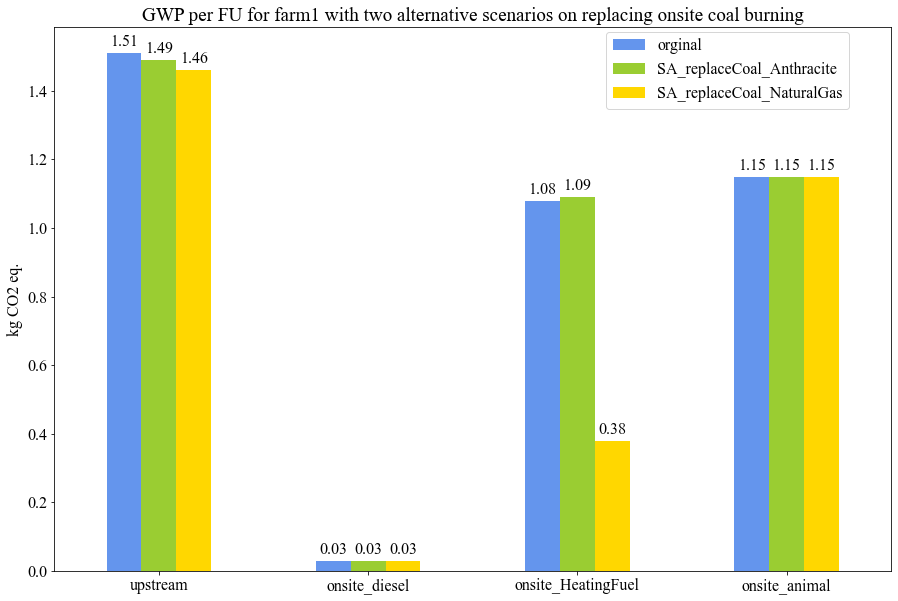

In [205]:
fig, ax = plt.subplots(figsize=(15, 10))

df.plot.bar(rot=0, ax=ax, zorder=2,
    color=["cornflowerblue", "yellowgreen", "gold"])
for container in ax.containers:
    ax.bar_label(container, padding=3)
    
plt.title("GWP per FU for farm1 with two alternative scenarios on replacing onsite coal burning") 
plt.legend(bbox_to_anchor=(0., 0.85, 0.95, .102), loc='lower right', ncol=1,  borderaxespad=0.)
plt.ylabel("kg CO2 eq.")
plt.xticks(rotation=0)


RAW GWP calculation

In [188]:
globals()['onsiteLCA_farm%s' % x].lcia()
globals()['onsiteLCA_farm%s' % x].score

0.0

In [189]:
globals()['onsite_diesel_farm%s' % x].lcia()
globals()['onsite_diesel_farm%s' % x].score

0.03096301476623808

In [190]:
globals()['onsite_coal_farm%s' % x].lcia()
globals()['onsite_coal_farm%s' % x].score

1.0781550273806735

In [191]:
globals()['onsite_animalemi_farm%s' % x].lcia()
globals()['onsite_animalemi_farm%s' % x].score

1.152105292753402

In [192]:
globals()['upstreamLCA_farm%s' % x].lcia()
globals()['upstreamLCA_farm%s' % x].score

1.510011797697786